In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import nltk
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from plotly.subplots import make_subplots
from sklearn.feature_extraction.text import CountVectorizer


# Importing and organizing the data

In [3]:
exp_path = 'data/dati_finali/exp/'
df_bitcoin_exp = pd.read_csv(exp_path + 'df_bitcoin_experts.csv', index_col=0)
df_energy_exp = pd.read_csv(exp_path + 'df_energy_experts.csv', index_col=0)
df_financial_exp = pd.read_csv(exp_path + 'df_financial_experts.csv', index_col=0)
df_inflation_exp = pd.read_csv(exp_path + 'df_inflation_experts.csv', index_col=0)
df_real_estate_exp = pd.read_csv(exp_path + 'df_real_estate_experts.csv', index_col=0)

In [4]:
experts_df = {
  'bitcoin' : df_bitcoin_exp,
  'energy' : df_energy_exp,
  'finance' : df_financial_exp,
  'inflation' : df_inflation_exp,
  'real_estate': df_real_estate_exp
}

In [5]:
men_path = 'data/dati_finali/men/'
df_bitcoin_men = pd.read_csv(men_path + 'df_bitcoin_men.csv', index_col=0)
df_energy_men = pd.read_csv(men_path + 'df_energy_men.csv', index_col=0)
df_financial_men = pd.read_csv(men_path + 'df_financial_men.csv', index_col=0)
df_inflation_men = pd.read_csv(men_path + 'df_inflation_men.csv', index_col=0)
df_real_estate_men = pd.read_csv(men_path + 'df_real_estate_men.csv', index_col=0)

In [6]:
men_df = {
  'bitcoin' : df_bitcoin_men,
  'energy' : df_energy_men,
  'finance' : df_financial_men,
  'inflation' : df_inflation_men,
  'real_estate': df_real_estate_men

}

# Preprocessing the data & plotting

Here we just add the column `dt` to the dataframes, this column will contain the date in a clear `datetime` format.

In [7]:
from dde.time_series.sentiment_analysis import date_time

for df in experts_df.values():
  df = date_time(df)

for df in men_df.values():
  df = date_time(df)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jack/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Sentiment analysis

Below we do the sentiment analysis and add the columns to each dataframe for positive, neutral and negative sentiment.

In [9]:
from dde.time_series.sentiment_analysis import sia_analysis

for df in experts_df.values():
  df = sia_analysis(df)

for df in men_df.values():
  df = sia_analysis(df)

In [10]:
experts_df['bitcoin']

,id,verb,userid,inreplyto,link,body,retweetbody,tweet_dt,postedtime,retweetcount,favoritescount,generator,locationname,locationcode,Max,tweet_date,dt,Positive Sentiment,Neutral Sentiment,Negative Sentiment
134,"tag:search.twitter.com,2005:1015694395600003073",post,id:twitter.com:159223677,NaN,http://twitter.com/StratfordPatch/statuses/101...,"['fill', 'tank', 'roadtrip', 'could', 'cost', ...",NaN,2018-07-07,2018-07-07T20:29:49.000Z,0,0.0,SocialFlow,NaN,NaN,26.0,2018-07-07,2018-07-07,0.170001,0.719001,0.111001
3177,"tag:search.twitter.com,2005:1321231013897478145",post,id:twitter.com:1280375948030939137,{'link': 'http://twitter.com/DeOdhranT/statuse...,http://twitter.com/TutorAndree/statuses/132123...,"['deodhrant', 'kindly', 'dm', 'essay', 'get', ...",NaN,2020-10-27,2020-10-27T23:23:15.000Z,0,0.0,TweetDeck,NaN,NaN,26.0,2020-10-27,2020-10-27,0.311001,0.485001,0.204001
4172,"tag:search.twitter.com,2005:1399772203814580224",post,id:twitter.com:1074588282,NaN,http://twitter.com/DeejayVirgo/statuses/139977...,"['exactly', 'think', 'wonder', 'low', 'price',...",NaN,2021-06-01,2021-06-01T16:57:54.000Z,0,0.0,Twitter for iPhone,NaN,NaN,26.0,2021-06-01,2021-06-01,0.000001,0.704001,0.296001
4176,"tag:search.twitter.com,2005:1400105865991147529",post,id:twitter.com:1037417626593415168,NaN,http://twitter.com/offbeatFLO/statuses/1400105...,"['new', 'beat', 'finish', 'collab', 'one', 'em...",NaN,2021-06-02,2021-06-02T15:03:45.000Z,0,0.0,Instagram,Winston-Salem,US,26.0,2021-06-02,2021-06-02,0.000001,1.000001,0.000001
8244,"tag:search.twitter.com,2005:527319470415437824",post,id:twitter.com:71344809,NaN,http://twitter.com/Jonathan_Feigen/statuses/52...,"['harden', 'want', 'post', 'ronnie', 'price', ...",NaN,2014-10-29,2014-10-29T04:42:13.000Z,0,0.0,TweetDeck,NaN,NaN,26.0,2014-10-29,2014-10-29,0.115001,0.885001,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863417,"tag:search.twitter.com,2005:1473001117428719626",post,id:twitter.com:1365750951861223429,{'link': 'http://twitter.com/WhiteHouse/status...,http://twitter.com/SlappingAsk/statuses/147300...,"['whitehouse', 'potus', 'majority', 'would', '...",NaN,2021-12-20,2021-12-20T18:43:28.000Z,0,0.0,Twitter for iPhone,NaN,NaN,26.0,2021-12-20,2021-12-20,0.038001,0.788001,0.175001
864015,"tag:search.twitter.com,2005:1494057444212981764",post,id:twitter.com:883728838580109312,NaN,http://twitter.com/CarolynWither12/statuses/14...,"['curious', 'gop', '$', '$', 'es', 'really', '...",NaN,2022-02-16,2022-02-16T21:13:47.000Z,0,0.0,Twitter for Android,NaN,NaN,26.0,2022-02-16,2022-02-16,0.205001,0.733001,0.062001
864435,"tag:search.twitter.com,2005:1501646953423196164",post,id:twitter.com:2242700706,{'link': 'http://twitter.com/Cripl3r1/statuses...,http://twitter.com/texasbluedot/statuses/15016...,"['cripl3r1', 'matt54198', 'abc', 'pay', 'royal...",NaN,2022-03-09,2022-03-09T19:51:47.000Z,0,0.0,Twitter for iPhone,NaN,NaN,26.0,2022-03-09,2022-03-09,0.074001,0.669001,0.257001
865604,"tag:search.twitter.com,2005:423960230989266946",post,id:twitter.com:24032908,NaN,http://twitter.com/indexshow/statuses/42396023...,"['econbizfin', 'inflation', 'weaken', 'far', '...",NaN,2014-01-16,2014-01-16T23:29:30.000Z,0,0.0,TweetDeck,NaN,NaN,26.0,2014-01-16,2014-01-16,0.176001,0.611001,0.214001


## Plots

In this section different types of plots for the distribution of sentiments across the different populations (e.g. bitcoin professionals, man-on-the-street real estate and so on)

In [11]:
from dde.time_series.sentiment_analysis import plot_sentiments

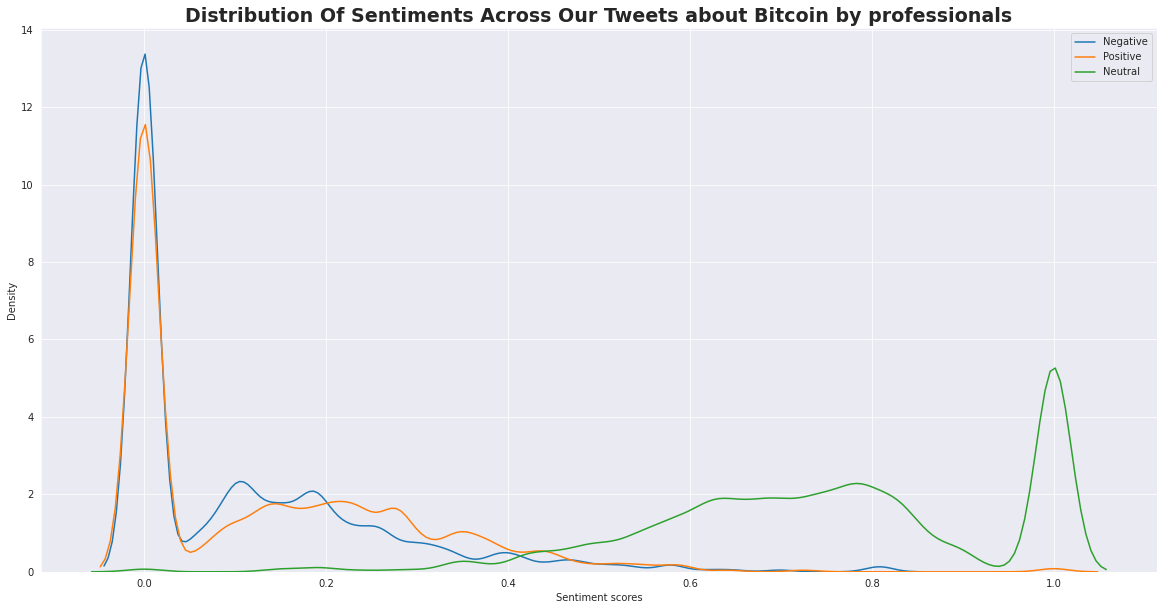

In [12]:
plot_sentiments(experts_df['bitcoin'], 'Bitcoin by professionals')

In [13]:
# plot_sentiments(experts_df['energy'],'Energy by Professionals')
# plot_sentiments(experts_df['finance'],'Financial by Professionals')
# similarly for the others

L'idea è di plottare la distribution delle sentiments per topic diversi (inflazione,bitcoin, petrolio,energia, oro etc)  in uno specifico arco temporale (es. 2020-2021 covid) e confrontare tra di loro i risultati. 
L'indicatore sarà quindi il sentiment per quel topic (vedendo ad esempio quanto i diversi topic hanno un andamento simile a quello dell'inflazione). 

Fare lo stesso procedimento per df_men e df_professional confrontando i risultati e vedere quale dei due ha un influenza maggiore sul sentiment dell'inflazione

In [14]:
from dde.time_series.sentiment_analysis import create_df_sent

for df in experts_df.values():
  df[['Max_SentimentCol', 'Max_SentimentValue']] = create_df_sent(df)


for df in men_df.values():
  df[['Max_SentimentCol', 'Max_SentimentValue']] = create_df_sent(df)

In [15]:
men_df['finance']

,id,verb,userid,inreplyto,link,body,retweetbody,tweet_dt,postedtime,retweetcount,...,locationname,locationcode,Max,tweet_date,dt,Positive Sentiment,Neutral Sentiment,Negative Sentiment,Max_SentimentCol,Max_SentimentValue
121,"tag:search.twitter.com,2005:1014310867264049153",post,id:twitter.com:27539448,NaN,http://twitter.com/stephenlutz/statuses/101431...,"['also', 'increasingly', 'medical', 'system']",NaN,2018-07-04,2018-07-04T00:52:10.000Z,0,...,NaN,NaN,12.0,2018-07-04,2018-07-04,0.000001,1.000001,0.000001,Neutral Sentiment,1.000001
188,"tag:search.twitter.com,2005:1024046600497373185",post,id:twitter.com:2241705200,{'link': 'http://twitter.com/BNightengale/stat...,http://twitter.com/JGideon818/statuses/1024046...,"['bnightengale', 'jonheyman', 'team', 'trade',...",NaN,2018-07-30,2018-07-30T21:38:30.000Z,0,...,NaN,NaN,12.0,2018-07-30,2018-07-30,0.279001,0.448001,0.274001,Neutral Sentiment,0.448001
348,"tag:search.twitter.com,2005:1042106171262468098",post,id:twitter.com:796961274789789696,NaN,http://twitter.com/LucyLettis/statuses/1042106...,"['get', 'ready', 'price', 'high', 'walmaand', ...",NaN,2018-09-18,2018-09-18T17:40:47.000Z,0,...,NaN,NaN,12.0,2018-09-18,2018-09-18,0.333001,0.667001,0.000001,Neutral Sentiment,0.667001
719,"tag:search.twitter.com,2005:1081416453184729088",post,id:twitter.com:162321344,NaN,http://twitter.com/uhmelia_/statuses/108141645...,"['sleep', 'get', 'good', 'price', 'right', 'us...",NaN,2019-01-05,2019-01-05T05:05:48.000Z,0,...,NaN,NaN,12.0,2019-01-05,2019-01-05,0.266001,0.734001,0.000001,Neutral Sentiment,0.734001
766,"tag:search.twitter.com,2005:1087121687223635975",post,id:twitter.com:902347219780517888,{'link': 'http://twitter.com/SeanWhite83/statu...,http://twitter.com/veteranmountian/statuses/10...,"['seanwhite83', 'raz0rfist', 'bad', 'price', '...",NaN,2019-01-20,2019-01-20T22:56:22.000Z,0,...,NaN,NaN,12.0,2019-01-20,2019-01-20,0.298001,0.553001,0.149001,Neutral Sentiment,0.553001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866216,"tag:search.twitter.com,2005:654786644281659392",post,id:twitter.com:33912658,{'link': 'http://twitter.com/BelizeFood/status...,http://twitter.com/RoboinNYC/statuses/65478664...,"['belizefood', 'hope', 'low', 'price', 'bze', ...",NaN,2015-10-15,2015-10-15T22:31:16.000Z,0,...,NaN,NaN,12.0,2015-10-15,2015-10-15,0.242001,0.583001,0.175001,Neutral Sentiment,0.583001
866217,"tag:search.twitter.com,2005:655414012478251008",post,id:twitter.com:720757765,NaN,http://twitter.com/WashParkRealty/statuses/655...,"['denver-area', 'house', 'price', '11', '%', '...",NaN,2015-10-17,2015-10-17T16:04:12.000Z,0,...,NaN,NaN,12.0,2015-10-17,2015-10-17,0.000001,1.000001,0.000001,Neutral Sentiment,1.000001
866280,"tag:search.twitter.com,2005:676287092813529089",post,id:twitter.com:18079631,{'link': 'http://twitter.com/michelletandler/s...,http://twitter.com/mattmireles/statuses/676287...,"['michelletandler', 'gselevator', 'soby', 'pri...",NaN,2015-12-14,2015-12-14T06:26:22.000Z,0,...,NaN,NaN,12.0,2015-12-14,2015-12-14,0.000001,0.704001,0.296001,Neutral Sentiment,0.704001
866397,"tag:search.twitter.com,2005:714796806455091200",post,id:twitter.com:2284341752,NaN,http://twitter.com/EnergizeMN/statuses/7147968...,"['canada', 'stocks-futures', 'oil', 'price', '...",NaN,2016-03-29,2016-03-29T12:50:13.000Z,0,...,NaN,NaN,12.0,2016-03-29,2016-03-29,0.000001,1.000001,0.000001,Neutral Sentiment,1.000001


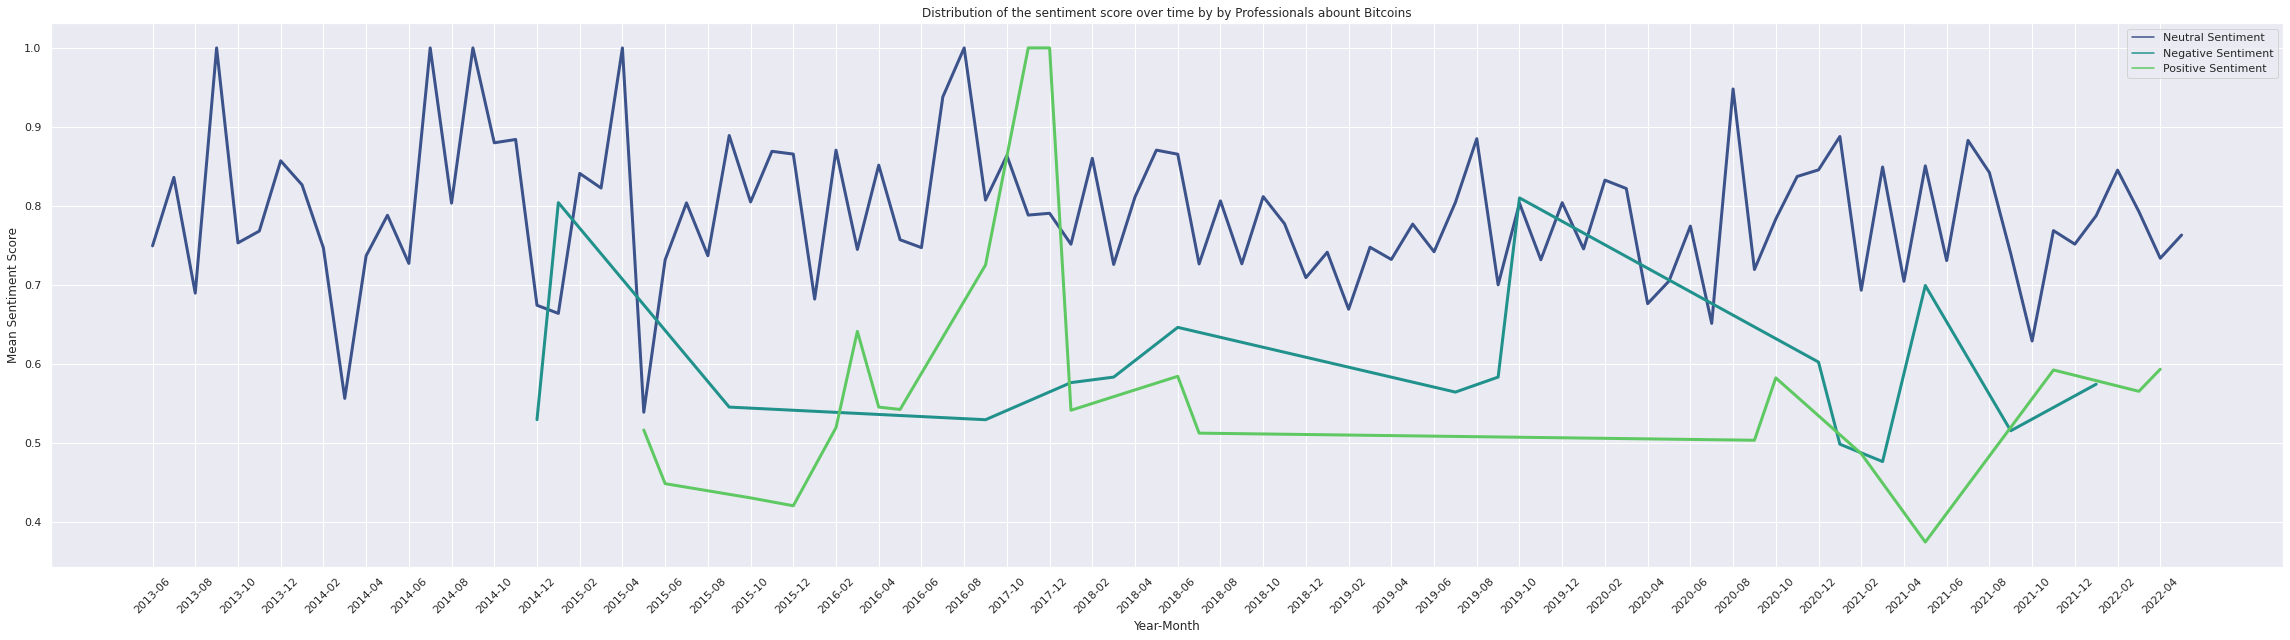

In [16]:
from dde.time_series.sentiment_analysis import plot_sent_distribution

plot_sent_distribution(experts_df['bitcoin'], 'by Professionals abount Bitcoins', no_plot=False)

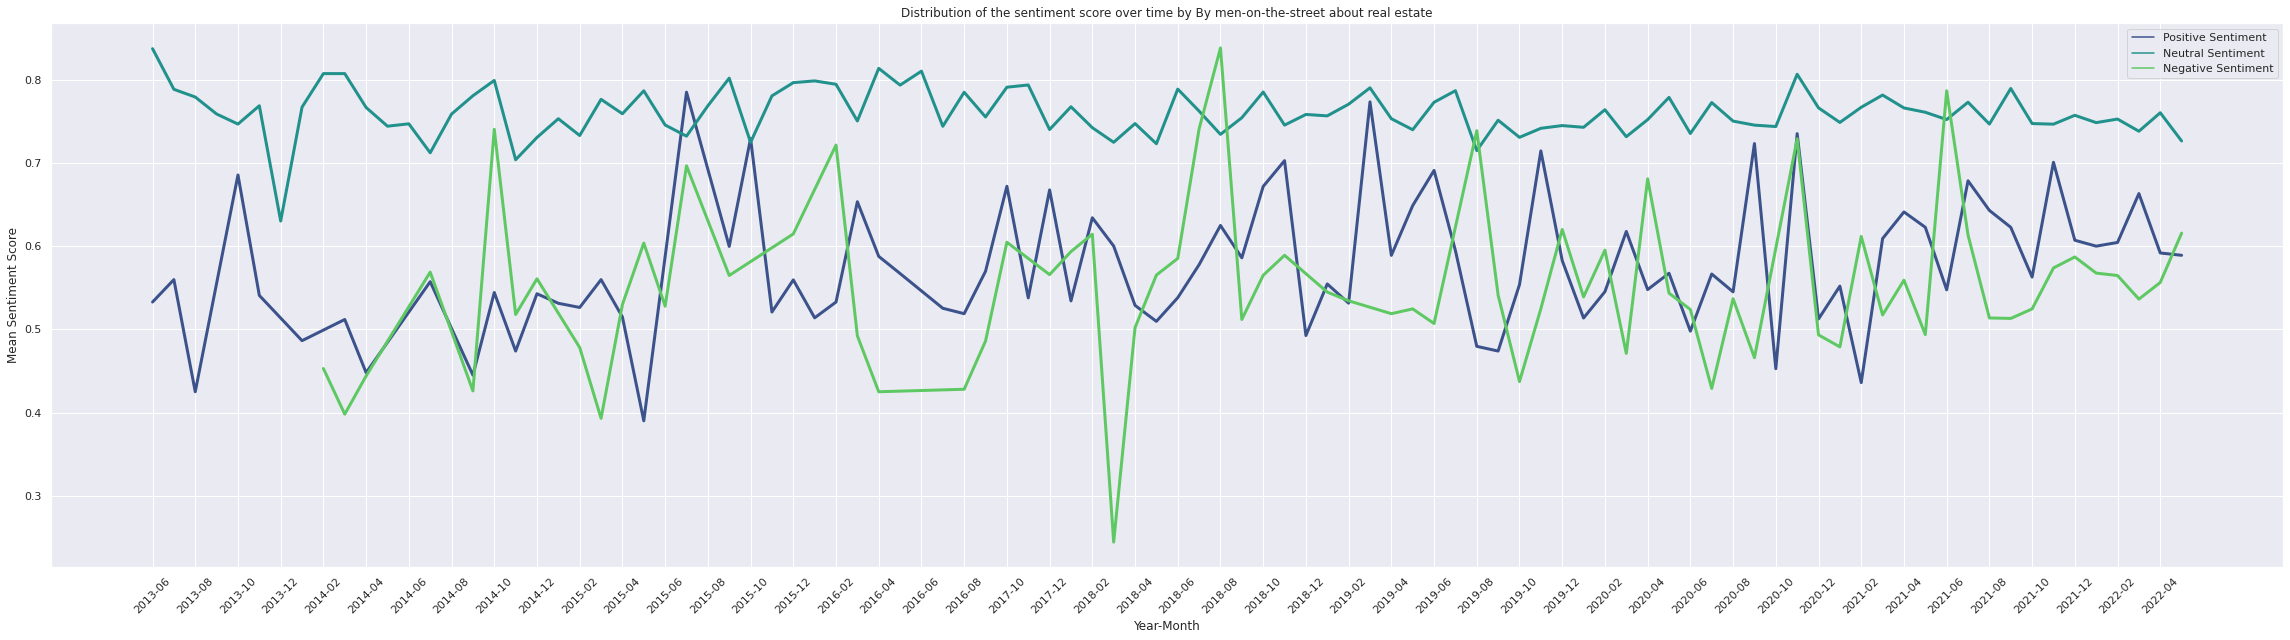

In [17]:
plot_sent_distribution(men_df['real_estate'], 'By men-on-the-street about real estate', no_plot=False)

In [18]:
# even if you don't want the plots this has to be run since it adds the YM columns to the dataframes which is necessary for later

for df in experts_df.values():
  plot_sent_distribution(df)

for df in men_df.values():
  plot_sent_distribution(df)

# Preparing the data for predicting the future

### An example

We would like to aggregate the sentiment values with the following encoding:

associate to each month a vector $[x_1, x_2, x_3]$ where each element, respectively, represents the mean in the month of the negative, neutral and positve sentiment

We first show this preprocessing on a single dataframe and then we move on to do it for all of them. We do it this way, because some steps may be difficult to understand, so we prefer to show it in a single case.


In [19]:
tmp1 = experts_df['bitcoin'].groupby(['Max_SentimentCol', 'YM'])[
  ['Max_SentimentValue', 'id']].agg(lambda x: list(x)).reset_index()
tmp1

,Max_SentimentCol,YM,Max_SentimentValue,id
0,Negative Sentiment,2014-12,[0.529001],"[tag:search.twitter.com,2005:540642702006972416]"
1,Negative Sentiment,2015-01,[0.8040010000000001],"[tag:search.twitter.com,2005:554770277683298304]"
2,Negative Sentiment,2015-09,[0.5450010000000001],"[tag:search.twitter.com,2005:641913950444068864]"
3,Negative Sentiment,2017-09,[0.529001],"[tag:search.twitter.com,2005:912302798607454208]"
4,Negative Sentiment,2018-01,[0.576001],"[tag:search.twitter.com,2005:952526577941835776]"
...,...,...,...,...
128,Positive Sentiment,2021-02,[0.48600099999999996],"[tag:search.twitter.com,2005:1361661498439831554]"
129,Positive Sentiment,2021-05,[0.374001],"[tag:search.twitter.com,2005:1397760263961591811]"
130,Positive Sentiment,2021-11,[0.592001],"[tag:search.twitter.com,2005:1463190230064791552]"
131,Positive Sentiment,2022-03,[0.565001],"[tag:search.twitter.com,2005:1502831232660525057]"


In [20]:
tmp2 = tmp1.copy()
tmp2['Max_SentimentValue'] = tmp1['Max_SentimentValue'].apply(lambda x: np.mean(x))
tmp2

,Max_SentimentCol,YM,Max_SentimentValue,id
0,Negative Sentiment,2014-12,0.529001,"[tag:search.twitter.com,2005:540642702006972416]"
1,Negative Sentiment,2015-01,0.804001,"[tag:search.twitter.com,2005:554770277683298304]"
2,Negative Sentiment,2015-09,0.545001,"[tag:search.twitter.com,2005:641913950444068864]"
3,Negative Sentiment,2017-09,0.529001,"[tag:search.twitter.com,2005:912302798607454208]"
4,Negative Sentiment,2018-01,0.576001,"[tag:search.twitter.com,2005:952526577941835776]"
...,...,...,...,...
128,Positive Sentiment,2021-02,0.486001,"[tag:search.twitter.com,2005:1361661498439831554]"
129,Positive Sentiment,2021-05,0.374001,"[tag:search.twitter.com,2005:1397760263961591811]"
130,Positive Sentiment,2021-11,0.592001,"[tag:search.twitter.com,2005:1463190230064791552]"
131,Positive Sentiment,2022-03,0.565001,"[tag:search.twitter.com,2005:1502831232660525057]"


In [21]:
tmp3 = tmp2.groupby(['YM'])[
  ['Max_SentimentCol', 'Max_SentimentValue', 'id']].agg(lambda x: list(x)).reset_index()
tmp3

,YM,Max_SentimentCol,Max_SentimentValue,id
0,2013-06,[Neutral Sentiment],[0.749201],"[[tag:search.twitter.com,2005:3491157347329638..."
1,2013-07,[Neutral Sentiment],[0.836001],"[[tag:search.twitter.com,2005:3548092091430420..."
2,2013-08,[Neutral Sentiment],[0.6893343333333334],"[[tag:search.twitter.com,2005:3716200070355517..."
3,2013-09,[Neutral Sentiment],[1.000001],"[[tag:search.twitter.com,2005:3779335514148085..."
4,2013-10,[Neutral Sentiment],[0.753001],"[[tag:search.twitter.com,2005:3959125015752867..."
...,...,...,...,...
91,2022-01,"[Negative Sentiment, Neutral Sentiment]","[0.574001, 0.7874555454545454]","[[tag:search.twitter.com,2005:1479432099300007..."
92,2022-02,[Neutral Sentiment],[0.8451676666666667],"[[tag:search.twitter.com,2005:1488557748925222..."
93,2022-03,"[Neutral Sentiment, Positive Sentiment]","[0.7926325789473684, 0.565001]","[[tag:search.twitter.com,2005:1498902008471953..."
94,2022-04,"[Neutral Sentiment, Positive Sentiment]","[0.7335248095238095, 0.593001]","[[tag:search.twitter.com,2005:1518709661335179..."


In [22]:
exp_time_series_data = pd.DataFrame()
exp_time_series_data['ym'] = tmp3['YM']
exp_time_series_data['sentiment_array'] = None

exp_time_series_data['sentiment_array'] = exp_time_series_data['sentiment_array'].apply(lambda x: np.array([0, 0, 0], dtype = float))

In [23]:
exp_time_series_data

,ym,sentiment_array
0,2013-06,"[0.0, 0.0, 0.0]"
1,2013-07,"[0.0, 0.0, 0.0]"
2,2013-08,"[0.0, 0.0, 0.0]"
3,2013-09,"[0.0, 0.0, 0.0]"
4,2013-10,"[0.0, 0.0, 0.0]"
...,...,...
91,2022-01,"[0.0, 0.0, 0.0]"
92,2022-02,"[0.0, 0.0, 0.0]"
93,2022-03,"[0.0, 0.0, 0.0]"
94,2022-04,"[0.0, 0.0, 0.0]"


In [24]:
from dde.time_series.time_series_functions import fill_time_series_data

fill_time_series_data(exp_time_series_data, tmp3, key = 'sentiment_array')

,ym,sentiment_array
0,2013-06,"[0.0, 0.749201, 0.0]"
1,2013-07,"[0.0, 0.836001, 0.0]"
2,2013-08,"[0.0, 0.6893343333333334, 0.0]"
3,2013-09,"[0.0, 1.000001, 0.0]"
4,2013-10,"[0.0, 0.753001, 0.0]"
...,...,...
91,2022-01,"[0.574001, 0.7874555454545454, 0.0]"
92,2022-02,"[0.0, 0.8451676666666667, 0.0]"
93,2022-03,"[0.0, 0.7926325789473684, 0.565001]"
94,2022-04,"[0.0, 0.7335248095238095, 0.593001]"


The preprocessing done above, can be summarized by this function:

In [25]:
from dde.time_series.time_series_functions import preprocess_df_time_series

preprocess_df_time_series(experts_df['bitcoin'])
# the result is the same

,YM,Max_SentimentCol,Max_SentimentValue,id
0,2013-06,[Neutral Sentiment],[0.749201],"[[tag:search.twitter.com,2005:3491157347329638..."
1,2013-07,[Neutral Sentiment],[0.836001],"[[tag:search.twitter.com,2005:3548092091430420..."
2,2013-08,[Neutral Sentiment],[0.6893343333333334],"[[tag:search.twitter.com,2005:3716200070355517..."
3,2013-09,[Neutral Sentiment],[1.000001],"[[tag:search.twitter.com,2005:3779335514148085..."
4,2013-10,[Neutral Sentiment],[0.753001],"[[tag:search.twitter.com,2005:3959125015752867..."
...,...,...,...,...
91,2022-01,"[Negative Sentiment, Neutral Sentiment]","[0.574001, 0.7874555454545454]","[[tag:search.twitter.com,2005:1479432099300007..."
92,2022-02,[Neutral Sentiment],[0.8451676666666667],"[[tag:search.twitter.com,2005:1488557748925222..."
93,2022-03,"[Neutral Sentiment, Positive Sentiment]","[0.7926325789473684, 0.565001]","[[tag:search.twitter.com,2005:1498902008471953..."
94,2022-04,"[Neutral Sentiment, Positive Sentiment]","[0.7335248095238095, 0.593001]","[[tag:search.twitter.com,2005:1518709661335179..."


In [26]:
preprocess_df_time_series(men_df['finance'])

,YM,Max_SentimentCol,Max_SentimentValue,id
0,2013-06,"[Neutral Sentiment, Positive Sentiment]","[0.7253086923076923, 0.582501]","[[tag:search.twitter.com,2005:3428257453384908..."
1,2013-07,[Neutral Sentiment],[0.754751],"[[tag:search.twitter.com,2005:3576723531336294..."
2,2013-08,[Neutral Sentiment],[0.9040009999999999],"[[tag:search.twitter.com,2005:3644610002231009..."
3,2013-09,[Neutral Sentiment],[0.7528760000000001],"[[tag:search.twitter.com,2005:3811538009855221..."
4,2013-10,[Neutral Sentiment],[0.7490010000000001],"[[tag:search.twitter.com,2005:3952172836702289..."
...,...,...,...,...
91,2022-01,"[Negative Sentiment, Neutral Sentiment, Positi...","[0.5104010000000001, 0.776305347826087, 0.626001]","[[tag:search.twitter.com,2005:1478933924436975..."
92,2022-02,"[Negative Sentiment, Neutral Sentiment, Positi...","[0.5823343333333334, 0.7354093333333332, 0.674...","[[tag:search.twitter.com,2005:1490541489662967..."
93,2022-03,"[Negative Sentiment, Neutral Sentiment, Positi...","[0.6439240769230768, 0.7697849195979899, 0.593...","[[tag:search.twitter.com,2005:1507700330313703..."
94,2022-04,"[Negative Sentiment, Neutral Sentiment, Positi...","[0.5403343333333334, 0.7397232222222222, 0.602...","[[tag:search.twitter.com,2005:1516624187925966..."


## Generating the feature matrices

### Initialization

Let's first generate all the feature matrices, one for the men-on-the-street and one for the professionals.

In [27]:
exp_time_series_data = pd.DataFrame()
exp_time_series_data['ym'] = preprocess_df_time_series(experts_df['inflation'])['YM'] # this is the dataframe with most rows

for key in experts_df.keys():
  exp_time_series_data[key] = None
  exp_time_series_data[key] = exp_time_series_data[key].apply(lambda x: np.array([0, 0, 0], dtype = float))

In [28]:
exp_time_series_data

,ym,bitcoin,energy,finance,inflation,real_estate
0,2013-06,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
1,2013-07,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
2,2013-08,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
3,2013-09,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
4,2013-10,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
...,...,...,...,...,...,...
91,2022-01,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
92,2022-02,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
93,2022-03,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
94,2022-04,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"


In [29]:
men_time_series_data = pd.DataFrame()
men_time_series_data['ym'] = preprocess_df_time_series(men_df['inflation'])['YM'] # this is the dataframe with most rows

for key in men_df.keys():
  men_time_series_data[key] = None
  men_time_series_data[key] = men_time_series_data[key].apply(lambda x: np.array([0, 0, 0], dtype = float))

In [30]:
men_time_series_data

,ym,bitcoin,energy,finance,inflation,real_estate
0,2013-06,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
1,2013-07,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
2,2013-08,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
3,2013-09,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
4,2013-10,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
...,...,...,...,...,...,...
91,2022-01,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
92,2022-02,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
93,2022-03,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
94,2022-04,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"


#### Filling the time series dataframe

In [31]:
from dde.time_series.time_series_functions import fill_time_series_data

for key, df in experts_df.items():
  exp_time_series_data = fill_time_series_data(exp_time_series_data, preprocess_df_time_series(df), key)

for key, df in men_df.items():
  men_time_series_data = fill_time_series_data(men_time_series_data, preprocess_df_time_series(df), key)

In [32]:
exp_time_series_data

,ym,bitcoin,energy,finance,inflation,real_estate
0,2013-06,"[0.0, 0.749201, 0.0]","[0.0, 0.739001, 0.0]","[0.0, 0.6760010000000001, 0.0]","[0.0, 0.7926676666666667, 0.0]","[0.5450010000000001, 0.7066676666666667, 0.0]"
1,2013-07,"[0.0, 0.836001, 0.0]","[0.0, 1.000001, 0.0]","[0.0, 0.8330010000000001, 0.0]","[0.0, 0.876801, 0.529001]","[0.0, 0.9653343333333333, 0.0]"
2,2013-08,"[0.0, 0.6893343333333334, 0.0]","[0.524001, 0.9013343333333333, 0.0]","[0.0, 0.5530010000000001, 0.0]","[0.0, 0.6640010000000001, 0.0]","[0.0, 0.6855009999999999, 0.0]"
3,2013-09,"[0.0, 1.000001, 0.0]","[0.0, 0.7636676666666666, 0.0]","[0.0, 0.7870010000000001, 0.0]","[0.38866766666666663, 0.777801, 0.549501]","[0.0, 0.794001, 0.0]"
4,2013-10,"[0.0, 0.753001, 0.0]","[0.0, 0.7302510000000001, 0.0]","[0.0, 0.5380010000000001, 0.0]","[0.0, 0.7883646363636365, 0.0]","[0.0, 0.850001, 0.0]"
...,...,...,...,...,...,...
91,2022-01,"[0.574001, 0.7874555454545454, 0.0]","[0.512001, 0.7646010000000001, 0.524001]","[0.0, 0.782501, 0.0]","[0.714001, 0.7932982972972974, 0.439001]","[0.0, 0.7546676666666667, 0.714001]"
92,2022-02,"[0.0, 0.8451676666666667, 0.0]","[0.0, 0.7928471538461539, 0.48466766666666666]","[0.0, 0.7578833529411765, 0.379001]","[0.538501, 0.8014625384615386, 0.5440010000000...","[0.5520010000000001, 0.7498397096774193, 0.400..."
93,2022-03,"[0.0, 0.7926325789473684, 0.565001]","[0.473001, 0.7307128644067797, 0.743001]","[0.0, 0.7756676666666666, 0.0]","[0.556501, 0.7906200476190476, 0.6790010000000...","[0.470501, 0.7670691818181816, 0.5175010000000..."
94,2022-04,"[0.0, 0.7335248095238095, 0.593001]","[0.42800099999999996, 0.7545619756097561, 0.72...","[0.0, 0.0, 0.0]","[0.0, 0.8025539411764706, 0.512251]","[0.5613343333333334, 0.7784867142857143, 0.435..."


In [33]:
men_time_series_data

,ym,bitcoin,energy,finance,inflation,real_estate
0,2013-06,"[0.0, 0.9205565555555554, 0.0]","[0.5410010000000001, 0.7069100909090908, 0.0]","[0.0, 0.7253086923076923, 0.582501]","[0.459001, 0.7783694210526316, 0.555001]","[0.0, 0.838101, 0.5330010000000001]"
1,2013-07,"[0.0, 0.8295343333333333, 0.0]","[0.0, 0.8415009999999999, 0.0]","[0.0, 0.754751, 0.0]","[0.450001, 0.780501, 0.514251]","[0.0, 0.7891210000000001, 0.560001]"
2,2013-08,"[0.0, 0.688101, 0.527001]","[0.0, 0.816174913043478, 0.728001]","[0.0, 0.9040009999999999, 0.0]","[0.528001, 0.8374203548387097, 0.580001]","[0.0, 0.7798494848484848, 0.42500099999999996]"
3,2013-09,"[0.0, 0.7870635, 0.0]","[0.699001, 0.7705426666666666, 0.505001]","[0.0, 0.7528760000000001, 0.0]","[0.42900099999999997, 0.7835971538461537, 0.0]","[0.0, 0.7594127647058824, 0.0]"
4,2013-10,"[0.606501, 0.8006676666666666, 0.0]","[0.0, 0.775608142857143, 0.5520010000000001]","[0.0, 0.7490010000000001, 0.0]","[0.0, 0.7633121111111109, 0.5628343333333334]","[0.0, 0.7472867142857142, 0.6860010000000001]"
...,...,...,...,...,...,...
91,2022-01,"[0.5753343333333334, 0.78864506779661, 0.52766...","[0.45480099999999996, 0.7606145458167329, 0.66...","[0.5104010000000001, 0.776305347826087, 0.626001]","[0.5902093333333334, 0.749355401805869, 0.6417...","[0.5678581428571429, 0.7490356534653466, 0.600..."
92,2022-02,"[0.5425394615384614, 0.747794893129771, 0.6480...","[0.6334555454545454, 0.7485674062500001, 0.645...","[0.5823343333333334, 0.7354093333333332, 0.674...","[0.5260779230769231, 0.7389324079422382, 0.593...","[0.5649593333333334, 0.7533179811320755, 0.604..."
93,2022-03,"[0.5608898888888889, 0.7425464545454546, 0.628...","[0.5715438571428572, 0.7546993240223464, 0.624...","[0.6439240769230768, 0.7697849195979899, 0.593...","[0.5566802452830188, 0.7520856905537459, 0.676...","[0.536521, 0.7386625384615384, 0.6635843333333..."
94,2022-04,"[0.352501, 0.7510701823899371, 0.5722232222222...","[0.6580010000000002, 0.7274445261707989, 0.587...","[0.5403343333333334, 0.7397232222222222, 0.602...","[0.5503224285714287, 0.7439961690821256, 0.614...","[0.5565635, 0.760927153846154, 0.5920919090909..."


In [37]:
exp_time_series_data.to_pickle('exp_feature_matrix.pkl')
men_time_series_data.to_pickle('men_feature_matrix.pkl')